# Degree Distribution of the new networks
---

En este notebook se encuentra el análisis de la distribución de grados de los nuevos \
modelos de red que se han desarrollado.

Con base en la literatura, una propiedad de las redes complejas o redes del mundo real \
es que su distribución de grados sigue una distribución de cola larga.

Para el análisis se toma como referencia las gráficas presentadas en el libro de  \
*Barabasi Network Science*. Se muestran cuatro alternativas para la representación \
de la distribución.



In [15]:
### importar bibliotecas

import igraph as ig
import matplotlib.pyplot as plt
import numpy as np

# For degree visualization
from math import log2, ceil
from collections import Counter


In [24]:
### Auxiliar functions

def calculate_log_binning(degree_distribution, n_bins):
    """Compute the log-binning y-values in the degree distribution.

    Divides the degree distribution in `n_bins` segments.

    Parameters
    ----------
    degree_distribution: list
        Network degree distribution.
    n_bins:
        Number of bins to assign.

    Returns
    -------
    (list, list)
        The (x_values, y_values_log_bin_list) tuple.
    """
    current_sum = 0
    previous_k = 0
    y_values_log_bin_list = []
    x_values = []

    for i in range(1, n_bins):
        x_values.append(previous_k)
        current_k = 2 ** (i)
        current_sum = current_sum + current_k
        temp_y_value = sum(degree_distribution[previous_k:current_k])
        temp_y_value = temp_y_value / (current_k-previous_k)
        y_values_log_bin_list.append(temp_y_value)
        previous_k = current_k

        if current_sum > len(degree_distribution):
            x_values.append(previous_k)
            temp_y_value = sum(degree_distribution[previous_k:len(degree_distribution)])
            temp_y_value = temp_y_value / (len(degree_distribution)-previous_k)
            y_values_log_bin_list.append(temp_y_value)            
            break

    return x_values, y_values_log_bin_list

def get_path_topbot(tpe):
    """Return the paht of a type of nodes."""
    
    if tpe:
        return "01-Top"
    else:
        return "02-Bot"

def get_path_dataset(ds):
    """Return the path of a dataset ds."""

    if ds == "AMZ":
        return "01-AMZ"
    elif ds == "HC":
        return "02-HC"
    elif ds == "PM":
        return "03-PM"
    elif ds == "UN":
        return "04-UN"
    else:
        return None

In [25]:
### GLOBAL VARIABLES

DATASET = "AMZ" # AMZ, HC, PM, UN
NODE_TYPE = True

PATH_DATASET = get_path_dataset(DATASET)
PATH_NODETYPE = get_path_topbot(NODE_TYPE)

FILE_GRAPH = "../00-Data/" + PATH_DATASET + "/" + PATH_NODETYPE + "/"
FILE_GRAPH = "../00-Data/01-AMZ/02-Graphs/01-Top/AMZ_top_hyperbolic_disparity_alpha1.graphml"

In [26]:
### Read a graph

g = ig.read(FILE_GRAPH)
print(g.summary(), "\n")

print("Graph info:")
print("\t|V| =", g.vcount())
print("\t|E| =", g.ecount())
print("\t d  =", g.density())

IGRAPH U-W- 9293 3197 -- 
+ attr: id (v), weight (e) 

Graph info:
	|V| = 9293
	|E| = 3197
	 d  = 7.404700439913786e-05


In [20]:
### Degree analysis

# Obtener la distribución de grados en forma de histograma
degree_list = sorted(g.degree())
degree_counts, degree_bins = np.histogram(degree_list, bins=max(degree_list))
print("Counts:", degree_counts[:10])
print("Bins:", degree_bins[:10])

Counts: [6929 1206  514  242  121   68   52   40   24   21]
Bins: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


<Figure size 640x480 with 0 Axes>

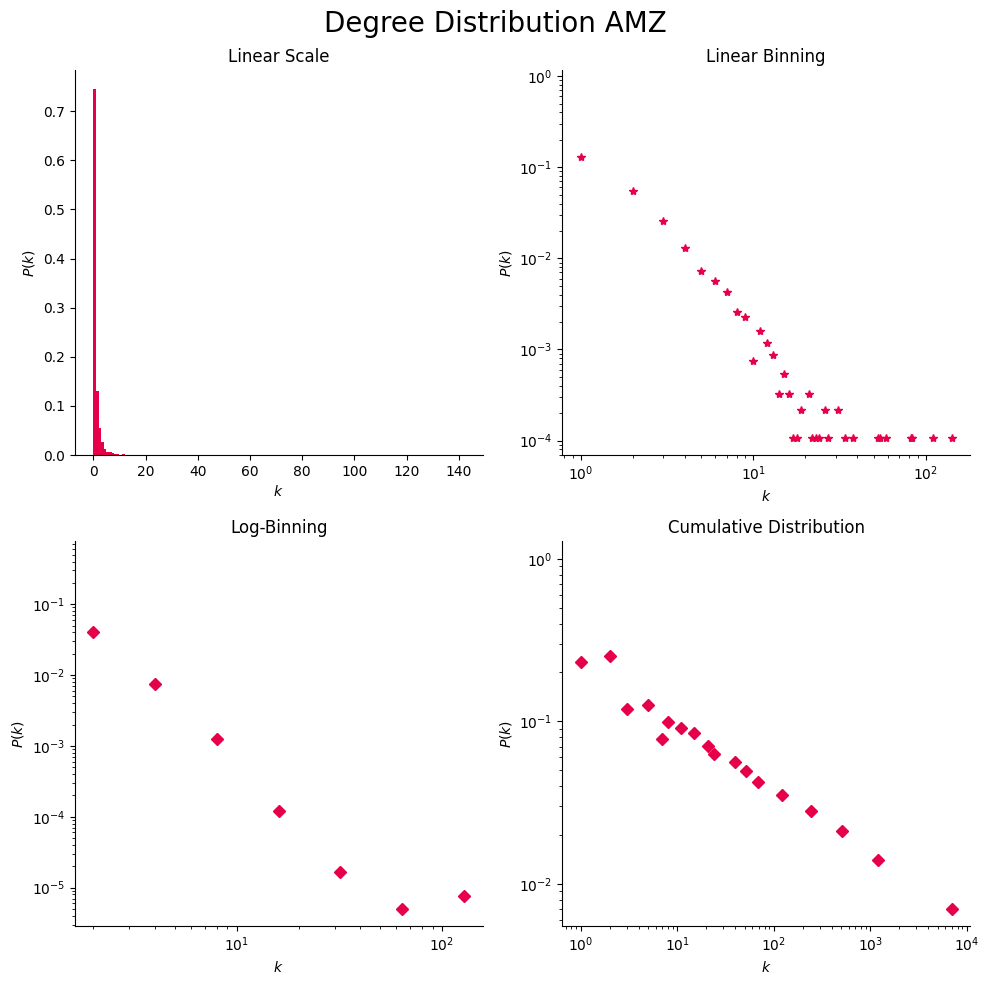

In [35]:
max_size = max(degree_counts)
size_graph_data = np.array(degree_counts) / sum(degree_counts)

plt.clf()
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# LINEAR SCALE
axs[0, 0].set_title('Linear Scale')
axs[0,0 ].bar(degree_bins[:-1], size_graph_data, color='#e60049',
              width=np.diff(degree_bins), align='edge') #Replicates plt.hist
#axs[0, 0].plot(sizedistri_counts, color='#e60049', marker="D", ls='None')
axs[0, 0].set(ylabel='$P(k)$', xlabel='$k$')
axs[0, 0].spines['top'].set_visible(False)
axs[0, 0].spines['right'].set_visible(False)

# LINEAR BINNING
axs[0, 1].set_title('Linear Binning')
axs[0, 1].plot(degree_bins[:-1], size_graph_data, color="#e60049", marker='*', ls='None')
axs[0, 1].loglog()
axs[0, 1].set(ylabel='$P(k)$', xlabel='$k$')
axs[0, 1].spines['top'].set_visible(False)
axs[0, 1].spines['right'].set_visible(False)

# LOG-BINNING
axs[1, 0].set_title('Log-Binning')
n_log_bin = ceil(log2(max_size))
x_values, y_values = calculate_log_binning(size_graph_data, n_log_bin)
axs[1, 0].plot(x_values, y_values, color='#e60049', marker="D", ls='None')
axs[1, 0].loglog()
axs[1, 0].set(ylabel='$P(k)$', xlabel='$k$')
axs[1, 0].spines['top'].set_visible(False)
axs[1, 0].spines['right'].set_visible(False)

# COMULATIVE
axs[1, 1].set_title("Cumulative Distribution")
degreeCount = Counter(degree_counts)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(np.array(cnt)/len(degree_counts))
axs[1, 1].loglog(deg, cs, color='#e60049', marker="D", ls='None')
axs[1, 1].set(ylabel='$P(k)$', xlabel='$k$')
axs[1, 1].spines['top'].set_visible(False)
axs[1, 1].spines['right'].set_visible(False)

fig.suptitle("Degree Distribution "+DATASET, fontsize=20)
fig.tight_layout()
plt.show()

In [56]:
alpha = fit_power_law(degree_list)
print(f"El exponente alfa estimado es: {alpha}") 

El exponente alfa estimado es: 0.22873807069124383


In [4]:
import numpy as np

# Parámetro 'a' de la distribución (alpha en tu pregunta, pero numpy usa 'a')
a = 2.5  # Ejemplo: un valor típico para la distribución de grados de un grafo

# Generar 100 números aleatorios
size = 1000
power_law_data = np.random.power(a, size)

# Escalado y conversión a enteros (opcional)
# Los valores generados están entre 0 y 1. Podemos escalarlos y convertirlos a enteros si es necesario.
min_val = 1  # Valor mínimo deseado para los grados
max_val = 1000 # Valor máximo deseado para los grados
power_law_data = (power_law_data * (max_val - min_val) + min_val).astype(int)

El exponente alfa estimado es: 2.0724635342409385


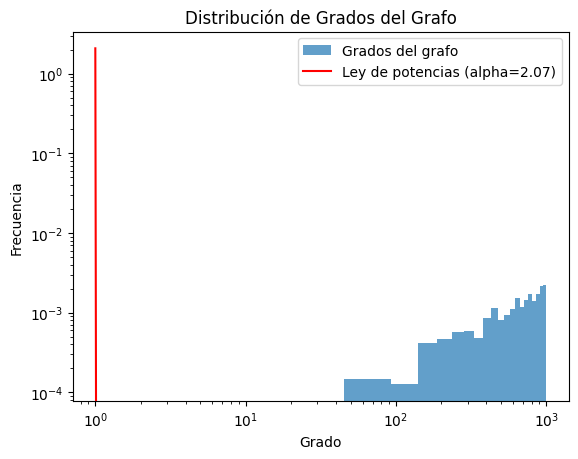

In [5]:
import numpy as np
import scipy.stats as stats

def fit_power_law(data):
  """
  Ajusta una distribución de ley de potencias a un conjunto de datos y estima el exponente alfa.

  Args:
    data: Un array o lista de números positivos (por ejemplo, grados de un grafo).

  Returns:
    alpha: El exponente alfa estimado.
  """

  # Asegurarse de que los datos sean positivos
  data = np.array(data)
  data = data[data > 0]

  # Estimación por MLE (utilizando la función de scipy.stats)
  alpha = stats.powerlaw.fit(data, floc=0)[0] #Ajusta la ley de potencias a los datos. El parámetro floc=0 indica que la distribución comienza en 0.

  return alpha

# Ejemplo de uso
#degrees = [1, 5, 2, 10, 3, 1, 2, 1, 8, 2]  # Grados de un grafo de ejemplo
degrees = power_law_data
alpha = fit_power_law(degrees)
print(f"El exponente alfa estimado es: {alpha}") 
import matplotlib.pyplot as plt

# ... (código anterior para estimar alpha) ...

# Crear un histograma de los grados
plt.hist(degrees, bins=20, density=True, alpha=0.7, label="Grados del grafo")

# Generar puntos para la distribución de ley de potencias ajustada
x = np.linspace(1, max(degrees), 100)
y = stats.powerlaw.pdf(x, alpha)

# Graficar la distribución de ley de potencias ajustada
plt.plot(x, y, color="red", label=f"Ley de potencias (alpha={alpha:.2f})")

plt.xlabel("Grado")
plt.ylabel("Frecuencia")
plt.title("Distribución de Grados del Grafo")
plt.loglog()
plt.legend()
plt.show()

El valor estimado de alpha es: 2.0


/var/folders/g4/vgr09c9n7pd31lk61zpr3_440000gn/T/ipykernel_2125/1099670970.py:16: RuntimeWarning: divide by zero encountered in power
  return C * k**(-alpha)
/var/folders/g4/vgr09c9n7pd31lk61zpr3_440000gn/T/ipykernel_2125/1099670970.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(ley_potencia, k, P_k, p0=[2.0, 1.0])


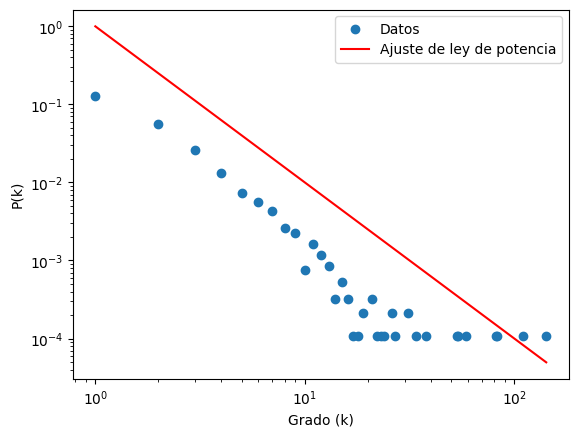

In [30]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Datos de ejemplo: grados de los nodos
grados = np.array(g.degree())

# Calcular la frecuencia de cada grado
k, f = np.unique(grados, return_counts=True)

# Calcular la frecuencia acumulada P(k)
P_k = f / np.sum(f)

# Ajuste de la ley de potencia usando regresión lineal en escala log-log
def ley_potencia(k, alpha, C):
    return C * k**(-alpha)

# Ajustar la curva
params, _ = curve_fit(ley_potencia, k, P_k, p0=[2.0, 1.0])

# El valor de alpha es el primer parámetro
alpha = params[0]
print(f"El valor estimado de alpha es: {alpha}")

# Graficar los datos y el ajuste
plt.scatter(k, P_k, label='Datos')
plt.plot(k, ley_potencia(k, *params), 'r-', label='Ajuste de ley de potencia')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.legend()
plt.show()

/var/folders/g4/vgr09c9n7pd31lk61zpr3_440000gn/T/ipykernel_2125/4134599101.py:8: RuntimeWarning: divide by zero encountered in power
  return C * k**(-alpha)  # Asegurarse de que esta función sea vectorizada
/var/folders/g4/vgr09c9n7pd31lk61zpr3_440000gn/T/ipykernel_2125/4134599101.py:28: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(ley_potencia, k, P_k, p0=[2.0, 1.0])
/var/folders/g4/vgr09c9n7pd31lk61zpr3_440000gn/T/ipykernel_2125/4134599101.py:33: RuntimeWarning: invalid value encountered in divide
  datos_teoricos = datos_teoricos / np.sum(datos_teoricos)  # Normalizar las frecuencias esperadas
/Users/ddiaz/Documents/code/envs/tesis/lib/python3.10/site-packages/scipy/stats/_stats_py.py:7985: RuntimeWarning: divide by zero encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp
/var/folders/g4/vgr09c9n7pd31lk61zpr3_440000gn/T/ipykernel_2125/4134599101.py:8: RuntimeWarning: overflow encountered in power
  return C * k**(-alpha) 

Mejor k_min: 1
Valor estimado de alpha: 1.545166076418127
P-valor de la prueba de chi-cuadrado: 1.0


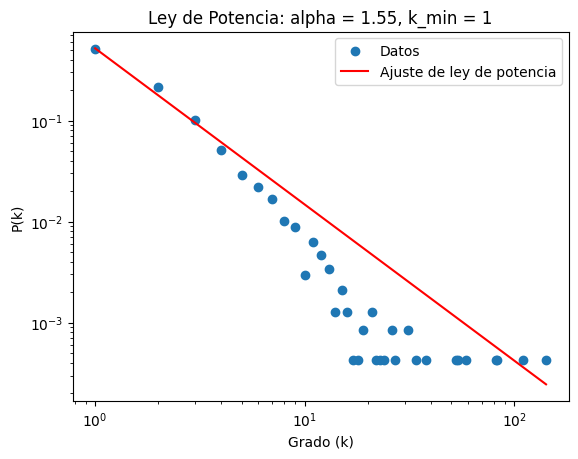

In [43]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chisquare
import matplotlib.pyplot as plt

# Función para ajustar la ley de potencia (vectorizada)
def ley_potencia(k, alpha, C):
    return C * k**(-alpha)  # Asegurarse de que esta función sea vectorizada

# Función para encontrar el mejor k_min
def encontrar_k_min(grados):
    k_min_candidatos = np.unique(grados)
    mejor_k_min = None
    mejor_alpha = None
    mejor_p_valor = 0

    for k_min in k_min_candidatos:
        # Filtrar grados mayores o iguales a k_min
        grados_filtrados = grados[grados >= k_min]
        if len(grados_filtrados) < 2:  # Necesitamos al menos 2 puntos para ajustar
            continue

        k, f = np.unique(grados_filtrados, return_counts=True)
        P_k = f / np.sum(f)  # Normalizar las frecuencias observadas

        try:
            # Ajustar la ley de potencia
            params, _ = curve_fit(ley_potencia, k, P_k, p0=[2.0, 1.0])
            alpha = params[0]

            # Generar datos teóricos para la prueba de chi-cuadrado
            datos_teoricos = ley_potencia(k, alpha, params[1])
            datos_teoricos = datos_teoricos / np.sum(datos_teoricos)  # Normalizar las frecuencias esperadas

            # Prueba de chi-cuadrado para bondad de ajuste
            chi2_statistic, p_valor = chisquare(f_obs=P_k, f_exp=datos_teoricos)

            # Seleccionar el k_min con el mejor p-valor
            if p_valor > mejor_p_valor:
                mejor_k_min = k_min
                mejor_alpha = alpha
                mejor_p_valor = p_valor

        except RuntimeError:
            continue

    return mejor_k_min, mejor_alpha, mejor_p_valor

# Datos de ejemplo: grados de los nodos
grados = np.array(g.degree())

# Encontrar el mejor k_min y estimar alpha
k_min, alpha, p_valor = encontrar_k_min(grados)
print(f"Mejor k_min: {k_min}")
print(f"Valor estimado de alpha: {alpha}")
print(f"P-valor de la prueba de chi-cuadrado: {p_valor}")

# Filtrar grados mayores o iguales a k_min
grados_filtrados = grados[grados >= k_min]
k, f = np.unique(grados_filtrados, return_counts=True)
P_k = f / np.sum(f)

# Ajustar la ley de potencia con el mejor k_min
params, _ = curve_fit(ley_potencia, k, P_k, p0=[2.0, 1.0])

# Graficar los datos y el ajuste
plt.scatter(k, P_k, label='Datos')
plt.plot(k, ley_potencia(k, *params), 'r-', label='Ajuste de ley de potencia')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grado (k)')
plt.ylabel('P(k)')
plt.legend()
plt.title(f'Ley de Potencia: alpha = {alpha:.2f}, k_min = {k_min}')
plt.show()